## Telescope observation based on weather

We know the probability of a cloudy day given a sunny day before and vice versa. Let's build a Markov chain of the weather from the following probabilities:


$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$

we consider sunny = 1, cloudy = 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_days = 10 ** 4
day_0 = 0 #starting from a cloudy day

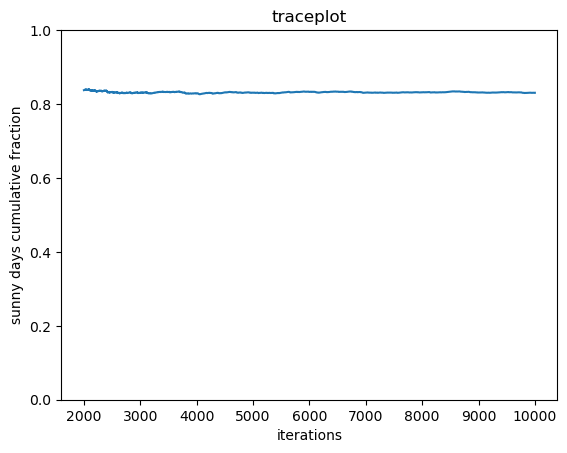

In [7]:
day_current = day_0
p_current = 1
weather = [day_current]

n_sunny = 0
if day_0 == 1: n_sunny = 1 #total number of sunny days, including the initial one

sunny_fraction = [n_sunny / 1]

#print('current day, prop. day, p current, p prop\n')
for i in range(1, n_days):
#determining probability of tomorrow's proposed weather based on today's
    if (weather[i - 1] == 0): #if today is cloudy
        weather.append(np.random.choice(np.array([0, 1]), p=np.array([0.5, 0.5])))     
    else: #if today is sunny
        weather.append(np.random.choice(np.array([0, 1]), p=np.array([0.1, 0.9])))

    if weather[i] == 1: n_sunny = n_sunny + 1
    sunny_fraction.append(n_sunny / (i + 1))
    
plt.plot(range(2000, n_days), sunny_fraction[2000:]) #we cut the first 2000 days as they're not stationary
plt.ylim([0, 1])
plt.xlabel('iterations')
plt.ylabel('sunny days cumulative fraction')
plt.title('traceplot')
plt.show()

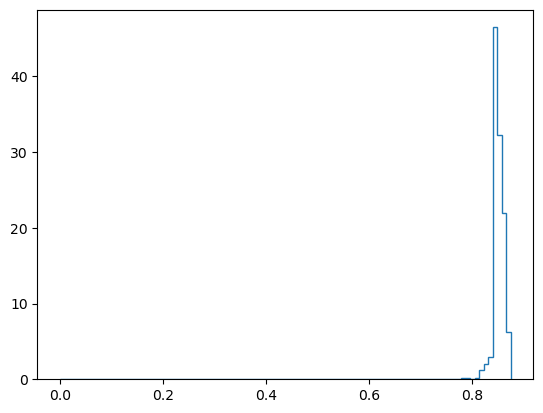

In [6]:
plt.hist(sunny_fraction, int(np.sqrt(n_days)), histtype = 'step', density = True)
plt.show()

In [19]:
#print('median = ', np.median(sunny_fraction[2000:]))
print('mean = ', np.mean(sunny_fraction))
print('error on the mean = ', np.std(sunny_fraction)/np.sqrt(n_days))

mean =  0.8390481863351391
error on the mean =  0.00024939950887778293


## Stock market MC
We now want to do the same for the Markovian process describing the stock market.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

We'll keep the same number of iterations as the weather case and define the conditions of the market as follows:
- Bull market = 0,
- Bear market = 1,
- Stagnant market = 2.

We will build a function which takes the first day: this way we can repeat the process in different initial conditions and see how it affects the chain. Either way, after the burn-in phase, the process should get stationary and be independent of the starting point.

In [101]:
n_days = 10 ** 5
def markov_chain(day_0):
    posterior = [day_0]
    for i in range(1, n_days):
        if posterior[i-1] == 0: posterior.append(np.random.choice(np.array([0, 1, 2]), p = np.array([0.9, 0.075, 0.025])))
        elif posterior[i-1] == 1: posterior.append(np.random.choice(np.array([0, 1, 2]), p = np.array([0.15, 0.8, 0.05])))
        else: posterior.append(np.random.choice(np.array([0, 1, 2]), p = np.array([0.25, 0.25, 0.5])))

    return posterior

In [102]:
day_0 = np.array([0, 1, 2])
posterior_arr = [markov_chain(d) for d in day_0]
n_market = 0
cumul_fraction = np.empty([len(day_0), n_days])

#computing the cumulative fraction of having a bull market with different starting days
for j in range(len(day_0)):
    for i in range(1, n_days + 1):
        if posterior_arr[j][i - 1] == 0: 
            n_market = n_market + 1
            #print(n_market)
        cumul_fraction[j][i-1] = n_market/i
    n_market = 0

#print(cumul_fraction[2])

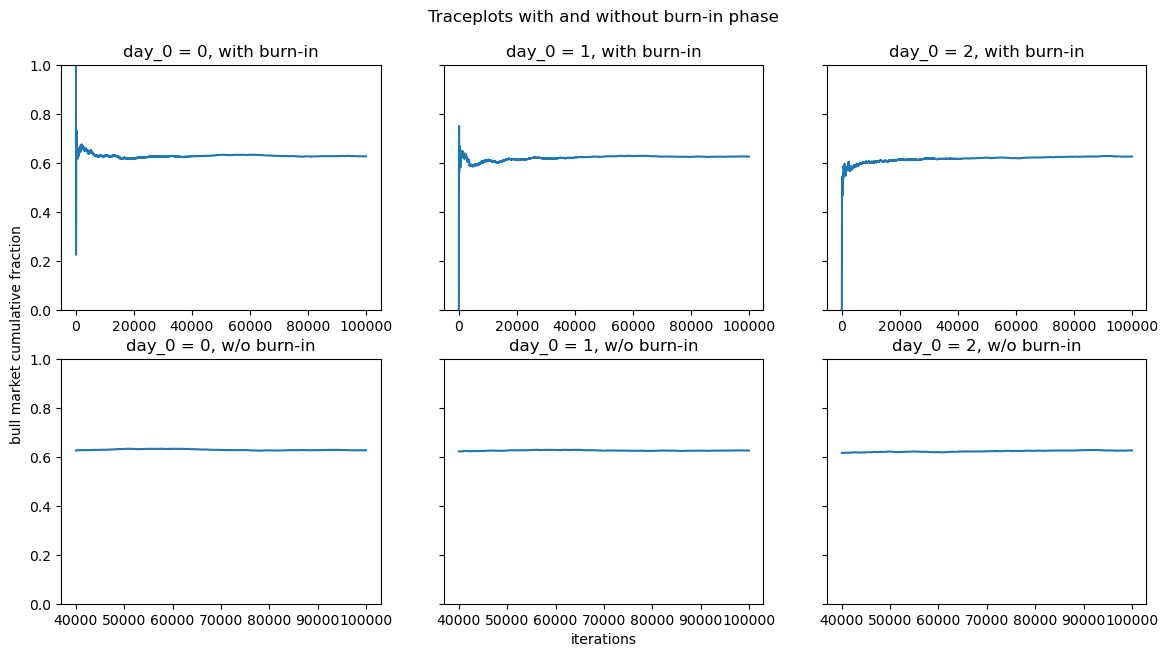

In [105]:
fig, ax = plt.subplots(2, 3, sharey = True, figsize=(14, 7))
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("iterations")
plt.ylabel("bull market cumulative fraction")
plt.title("Traceplots with and without burn-in phase\n\n")

for i in range(2):
    for j in range(3):
        if i == 0: 
            ax[i][j].plot(range(n_days), cumul_fraction[j])
            ax[i][j].set(ylim=([0, 1]), title = 'day_0 = ' + str(day_0[j]) + ', with burn-in')
        else: 
            ax[i][j].plot(range(40000, n_days), cumul_fraction[j, 40000:])
            ax[i][j].set(ylim=([0, 1]), title = 'day_0 = ' + str(day_0[j]) + ', w/o burn-in')

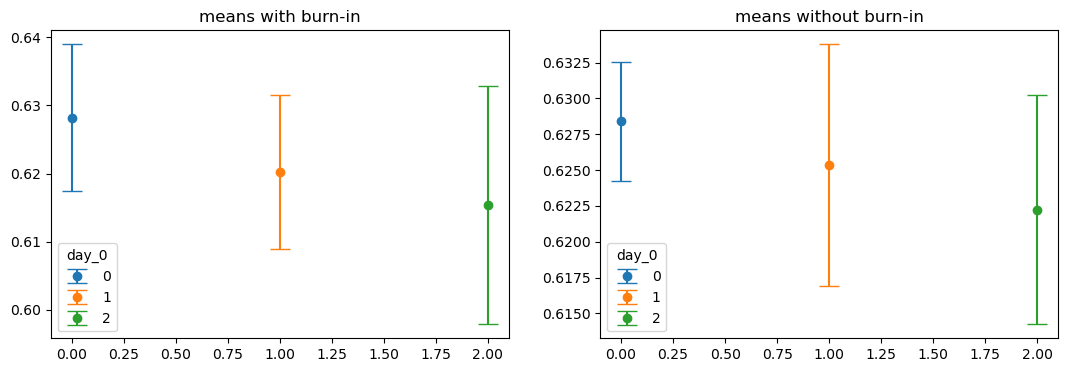

[[0.6281878003994807, 0.6202520646580266, 0.6153543514742309], [0.6284231513263387, 0.6253326370126747, 0.6222296980469547], 0.6287843276879423]


In [107]:
means[0] = [np.mean(cf) for cf in cumul_fraction]
err_means[0] = [np.std(cf) for cf in cumul_fraction]

means[1] = [np.mean(cf[40000:]) for cf in cumul_fraction]
err_means[1] = [np.std(cf[4000:]) for cf in cumul_fraction]

fig, ax = plt.subplots(1, 2, figsize = (13, 4))
for i in range(3): ax[0].errorbar(i, means[0][i], yerr=err_means[0][i], capsize= 7, fmt='o', label = str(i))
ax[0].set_title('means with burn-in')
ax[0].legend(title='day_0')

for i in range(3): ax[1].errorbar(i, means[1][i], yerr=err_means[1][i], capsize= 7, fmt='o', label = str(i))
ax[1].set_title('means without burn-in')
ax[1].legend(title='day_0')

plt.show()

print(means)

The means seem to be compatible, meaning the process has reached a stationary phase like we expected.